<a href="https://colab.research.google.com/github/makhlufiaero338/tugas-machine-learning/blob/main/tugasperbaikan/Tugas_perbaikan_bab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, NMF
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [3]:
# Data untuk eksperimen
iris = datasets.load_iris()
data = iris.data
target = iris.target

# **1. Preprocessing and Scaling**
# Imputation untuk menangani nilai yang hilang
data_with_missing = data.copy()
data_with_missing[0, 0] = np.nan  # Tambahkan nilai hilang untuk contoh
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_with_missing)

# Scaling data (standar atau normalisasi)
scaler = StandardScaler()  # Atau MinMaxScaler()
data_scaled = scaler.fit_transform(data_imputed)

In [4]:
# **2. Dimensionality Reduction and Feature Extraction**
# PCA untuk reduksi dimensi
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# NMF untuk data non-negatif
nmf = NMF(n_components=2, init='random', random_state=0, max_iter=500)
data_nmf = nmf.fit_transform(np.abs(data_scaled))  # Data harus non-negatif

# t-SNE untuk manifold learning
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)

In [5]:
# **3. Clustering**
# k-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(data_scaled)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)

In [9]:
# Silhouette Score untuk clustering
silhouette_kmeans = silhouette_score(data_scaled, kmeans_labels)
silhouette_agg = silhouette_score(data_scaled, agg_labels)

In [10]:
# Filter data untuk DBSCAN
valid_data = data_scaled[dbscan_labels != -1]  # Data tanpa noise
valid_labels = dbscan_labels[dbscan_labels != -1]  # Label tanpa noise
silhouette_dbscan = silhouette_score(valid_data, valid_labels)

In [12]:

# Print Silhouette Scores
print(f"Silhouette Score (k-Means): {silhouette_kmeans:.2f}")
print(f"Silhouette Score (Agglomerative): {silhouette_agg:.2f}")
print(f"Silhouette Score (DBSCAN): {silhouette_dbscan:.2f}")

Silhouette Score (k-Means): 0.48
Silhouette Score (Agglomerative): 0.44
Silhouette Score (DBSCAN): 0.65


In [13]:
# **5. Visualisasi**
# Fungsi visualisasi untuk clustering
def plot_clustering(data_2d, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.colorbar(label='Cluster Label')
    plt.show()

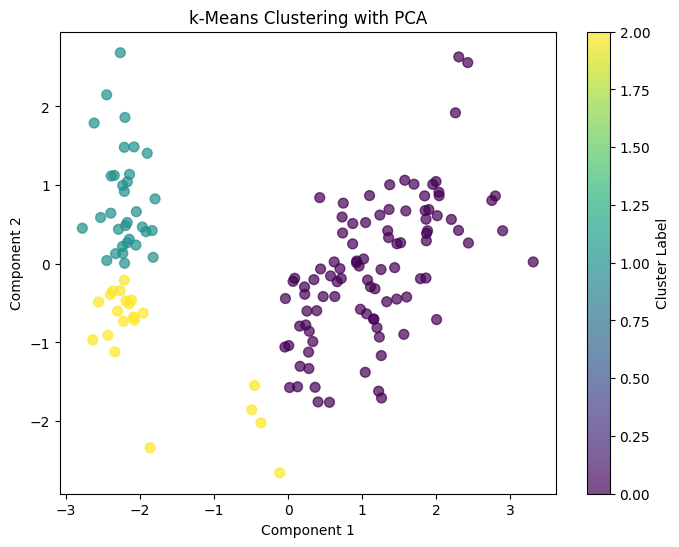

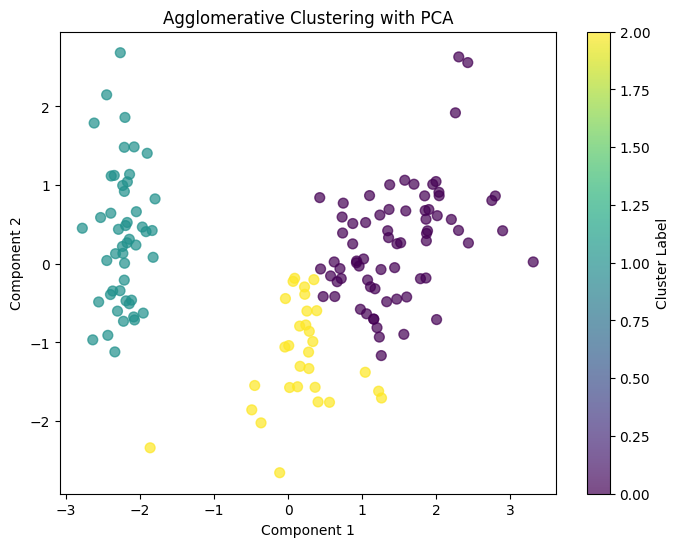

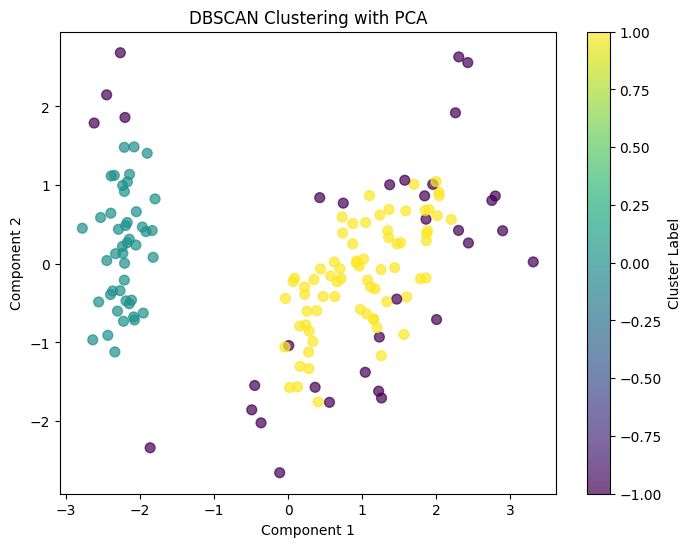

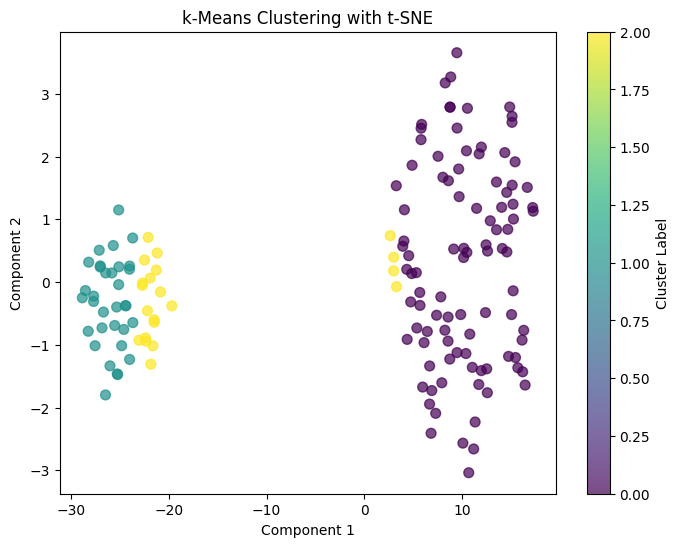

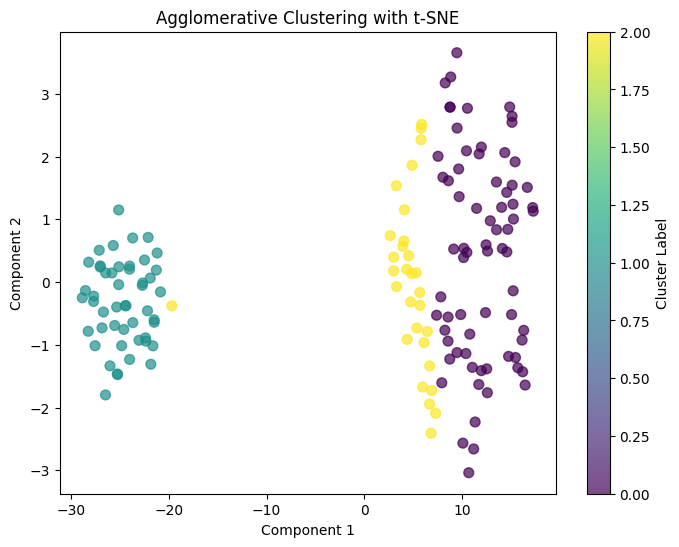

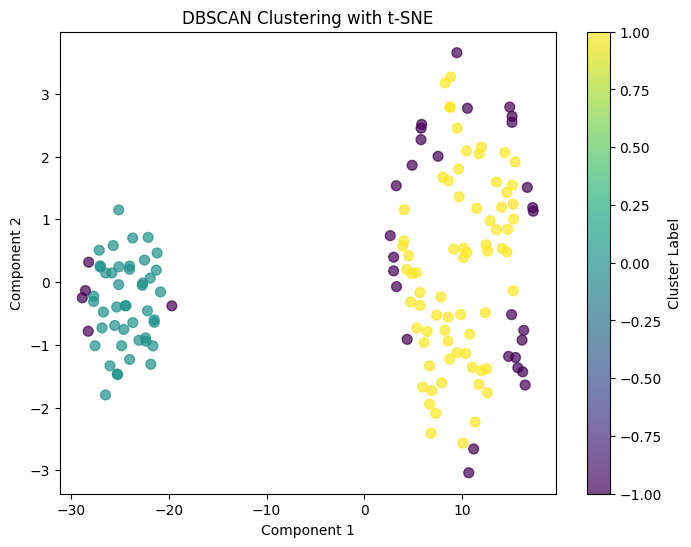

Pipeline preprocessing, dimensionality reduction, and clustering completed.


In [14]:
# Visualisasi hasil clustering setelah reduksi dimensi dengan PCA
plot_clustering(data_pca, kmeans_labels, "k-Means Clustering with PCA")
plot_clustering(data_pca, agg_labels, "Agglomerative Clustering with PCA")
plot_clustering(data_pca, dbscan_labels, "DBSCAN Clustering with PCA")

# Visualisasi dengan t-SNE
plot_clustering(data_tsne, kmeans_labels, "k-Means Clustering with t-SNE")
plot_clustering(data_tsne, agg_labels, "Agglomerative Clustering with t-SNE")
plot_clustering(data_tsne, dbscan_labels, "DBSCAN Clustering with t-SNE")

# **6. Summary**
print("Pipeline preprocessing, dimensionality reduction, and clustering completed.")